<a href="https://colab.research.google.com/github/Nadezda-Sut/statistics_in_science/blob/main/Logistic%20regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COURSE: Master Python for scientific programming by solving projects
## PROJECT: Statistics
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/maspy_x/?couponCode=202201

In [1]:
# import all necessary modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats

# Download and inspect the data

In [2]:
#link google colab and google drive

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# path to file in google drive

file_path = "/content/gdrive/My Drive/Colab Notebooks/last.csv"
data = pd.read_csv(file_path)
data

,№,Студенты (1)школьники(0),Использую для учебных и образовательных целей,"Использую в целях, не связанных с обучением или образованием","Использую и для учебных, и для не учебных целей",Не использую,Хочу научиться использовать,Компонент знаний,Умею,Не умею,...,"6. Тесты и тренажеры для самопроверки, подготовки к экзаменам и контрольным работам",7. Моделирование экспериментов в виртуальной среде,"8. Дополнительные занятия (например, по скайпу)",9. Участие в онлайн-олимпиадах и конкурсах,"10. Обмен информацией, связанной с учебой, с одногруппниками (в мессенджерах, социальных сетях)","11. Обмен информацией, связанной с учебой, с преподавателями (в мессенджерах, социальных сетях)",Ваш пол:,Ваш возраст:,Как Вы учитесь в этом году?,Какое техническое устройство Вы предпочитаете
0,511,0,0,0,0,10,0,0,1,10,...,1,2,1,2,1,2,1,13,4,1
1,593,0,0,0,0,10,0,0,11,0,...,2,2,2,2,2,2,0,13,2,1
2,577,0,0,0,0,0,10,0,6,5,...,3,3,2,3,4,2,0,14,3,1
3,557,0,0,0,0,10,0,0,11,0,...,2,2,2,2,2,2,1,17,3,1
4,506,0,0,1,0,9,0,10,11,0,...,0,0,0,0,0,0,0,14,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601,310,1,0,5,5,0,0,100,9,2,...,0,0,0,0,3,1,1,24,4,2
602,316,1,9,1,0,0,0,100,8,3,...,4,3,4,4,2,4,0,24,4,2
603,77,1,1,1,8,0,0,100,6,5,...,2,0,1,1,4,4,0,25,5,2
604,272,1,0,0,10,0,0,100,11,0,...,3,2,2,2,4,3,0,25,4,2


In [ ]:
# describe the data

data.describe()

,№,Студенты (1)школьники(0),Использую для учебных и образовательных целей,"Использую в целях, не связанных с обучением или образованием","Использую и для учебных, и для не учебных целей",Не использую,Компонент знаний,Умею,Не умею,Компонент ответственности (обеспечения безопасности),...,"6. Тесты и тренажеры для самопроверки, подготовки к экзаменам и контрольным работам",7. Моделирование экспериментов в виртуальной среде,"8. Дополнительные занятия (например, по скайпу)",9. Участие в онлайн-олимпиадах и конкурсах,"10. Обмен информацией, связанной с учебой, с одногруппниками (в мессенджерах, социальных сетях)","11. Обмен информацией, связанной с учебой, с преподавателями (в мессенджерах, социальных сетях)",Ваш пол:,Ваш возраст:,Как Вы учитесь в этом году?,"Какое техническое устройство Вы предпочитаете использовать для того, чтобы искать в интернете информацию, необходимую для выполнения учебных заданий? Выберите один вариант, который для Вас наиболее предпочтителен:1 смартфон,2 комп/ноут,3 планшет"
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.00000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,285.000000,0.537786,1.253076,2.702988,4.826011,0.861160,87.820738,9.050967,1.949033,82.282460,...,2.388401,1.414763,1.71529,1.456942,3.045694,2.427065,0.284710,17.987698,3.681898,1.609842
std,164.400426,0.499009,2.091043,2.098291,2.899665,1.149121,14.685537,2.151613,2.151613,19.560051,...,1.229883,1.410546,1.43269,1.347399,1.060504,1.244158,0.451673,2.875012,0.840673,0.583495
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,0.000000,18.180000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,12.000000,1.000000,1.000000
25%,143.000000,0.000000,0.000000,1.000000,3.000000,0.000000,80.000000,8.000000,0.000000,72.730000,...,1.000000,0.000000,0.00000,0.000000,3.000000,2.000000,0.000000,16.000000,3.000000,1.000000
50%,285.000000,1.000000,0.000000,2.000000,5.000000,0.000000,90.000000,10.000000,1.000000,90.910000,...,3.000000,1.000000,2.00000,1.000000,3.000000,2.000000,0.000000,18.000000,4.000000,2.000000
75%,427.000000,1.000000,2.000000,4.000000,7.000000,1.000000,100.000000,11.000000,3.000000,100.000000,...,3.000000,2.000000,3.00000,2.000000,4.000000,3.000000,1.000000,20.000000,4.000000,2.000000
max,569.000000,1.000000,10.000000,10.000000,10.000000,7.000000,100.000000,11.000000,9.000000,100.000000,...,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,1.000000,26.000000,5.000000,3.000000


In [4]:
# variable names

data.keys()

Index(['№', 'Студенты (1)школьники(0)',
       'Использую для учебных и образовательных целей',
       'Использую в целях, не связанных с обучением или образованием',
       'Использую и для учебных, и для не учебных целей', 'Не использую',
       'Хочу научиться использовать', 'Компонент знаний', 'Умею', 'Не умею',
       'Компонент ответственности (обеспечения безопасности) ',
       'Использую для учебных и образовательных целей.1',
       'Использую в целях, не связанных с обучением или образованием.1',
       'Использую и для учебных и для неучебных целей', 'Не использую.1',
       'Компонент умений', 'Контент 6 (1,2,4,5,8,20)',
       'Коммуникация 7 (7,11,13, 16,17,19,23)',
       'Техносфера 6 (9,10,14,15,18,22)', 'Потребление 6 (3,6,12,21,24,25)',
       '1. Для развлечения, отдыха', '2. Для общения', '3. Для учебы',
       '4. Для поиска информации, не связанной с учебой', '5. Для покупок',
       '1. Поиск готовых решений и ответов, выполненных заданий',
       '2. Поиск доп

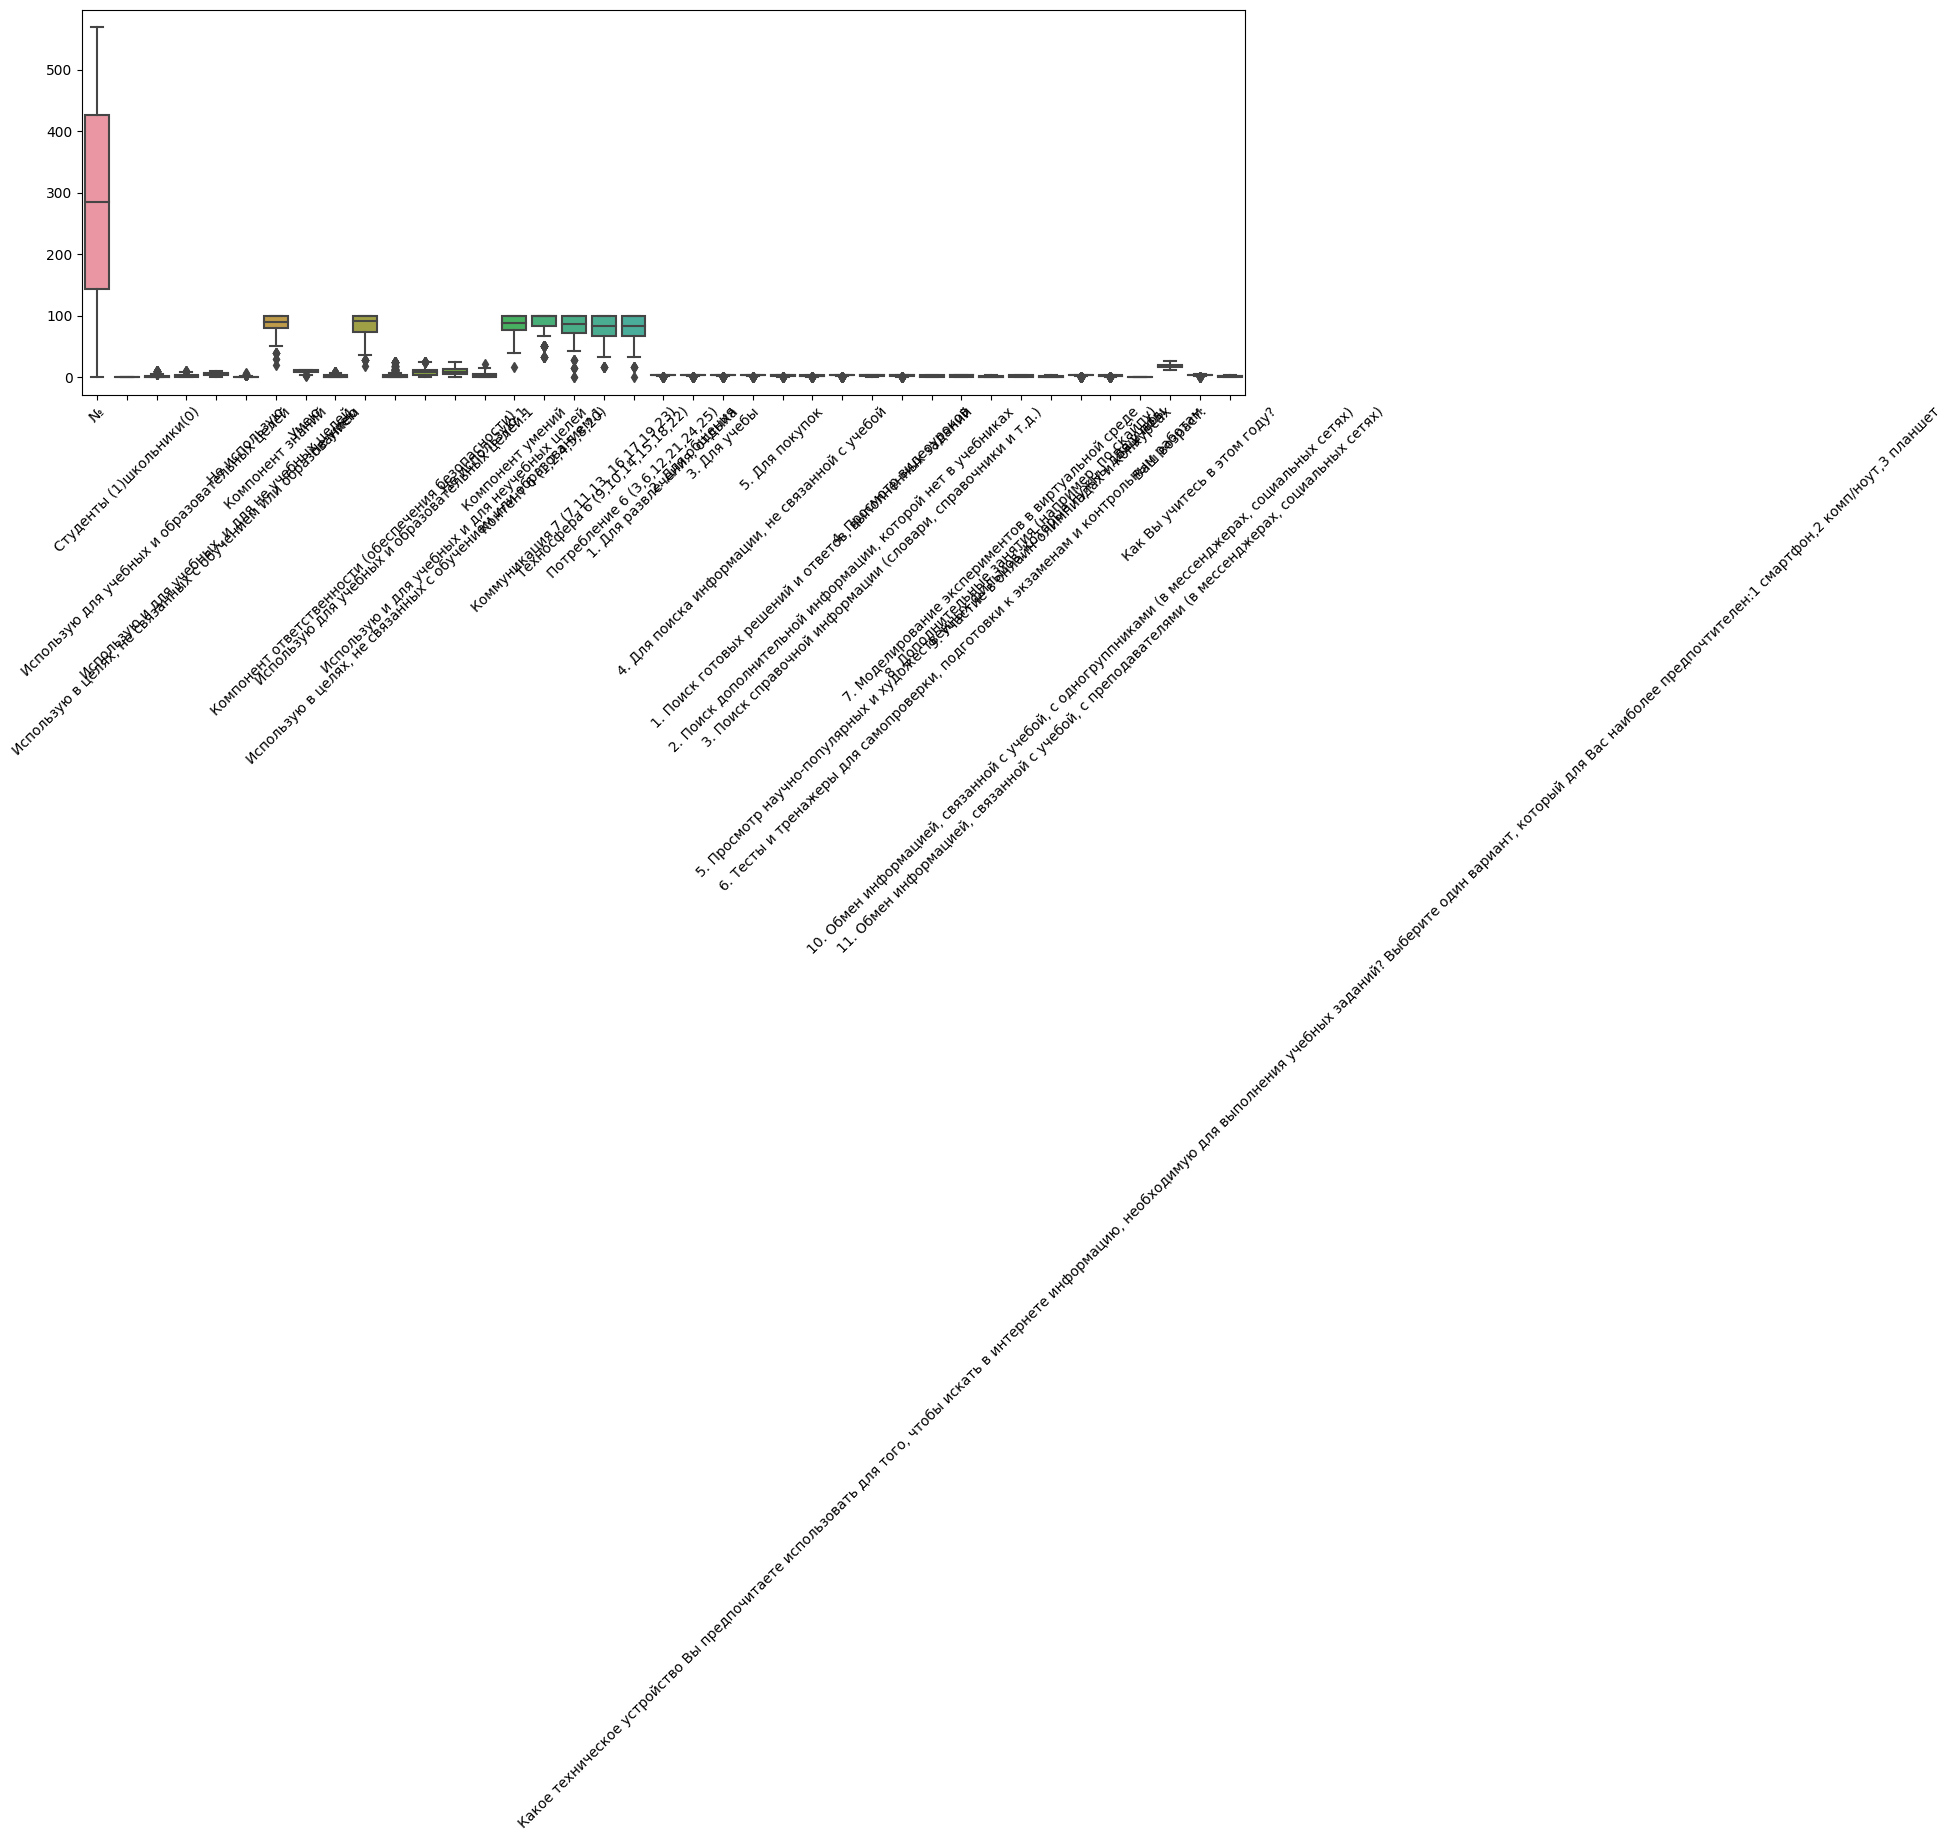

In [ ]:
fig,ax = plt.subplots(1,figsize=(15,5))

ax = sns.boxplot(data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

plt.show()

# Logistic regression

In [5]:
import statsmodels.api as sm

In [6]:
# binarize phone_1/comp_0 (the subject used a computer or telephone)
# binarization threshold

binthresh = np.mean(data['Студенты (1)школьники(0)'])

# 'binquality' column with Boolean type True or False

data['binquality'] = data['Студенты (1)школьники(0)'] > binthresh
data


,№,Студенты (1)школьники(0),Использую для учебных и образовательных целей,"Использую в целях, не связанных с обучением или образованием","Использую и для учебных, и для не учебных целей",Не использую,Хочу научиться использовать,Компонент знаний,Умею,Не умею,...,7. Моделирование экспериментов в виртуальной среде,"8. Дополнительные занятия (например, по скайпу)",9. Участие в онлайн-олимпиадах и конкурсах,"10. Обмен информацией, связанной с учебой, с одногруппниками (в мессенджерах, социальных сетях)","11. Обмен информацией, связанной с учебой, с преподавателями (в мессенджерах, социальных сетях)",Ваш пол:,Ваш возраст:,Как Вы учитесь в этом году?,Какое техническое устройство Вы предпочитаете,binquality
0,511,0,0,0,0,10,0,0,1,10,...,2,1,2,1,2,1,13,4,1,False
1,593,0,0,0,0,10,0,0,11,0,...,2,2,2,2,2,0,13,2,1,False
2,577,0,0,0,0,0,10,0,6,5,...,3,2,3,4,2,0,14,3,1,False
3,557,0,0,0,0,10,0,0,11,0,...,2,2,2,2,2,1,17,3,1,False
4,506,0,0,1,0,9,0,10,11,0,...,0,0,0,0,0,0,14,3,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601,310,1,0,5,5,0,0,100,9,2,...,0,0,0,3,1,1,24,4,2,True
602,316,1,9,1,0,0,0,100,8,3,...,3,4,4,2,4,0,24,4,2,True
603,77,1,1,1,8,0,0,100,6,5,...,0,1,1,4,4,0,25,5,2,True
604,272,1,0,0,10,0,0,100,11,0,...,2,2,2,4,3,0,25,4,2,True


In [17]:
# create a list containing columns to use in regression
# this is all the columns except for dependent variable and binquality



xcols = []


for key in data.keys():
  if key in [#'Студенты (1)школьники(0)',
       ####'Использую для учебных и образовательных целей',
       'Использую в целях, не связанных с обучением или образованием',
       'Использую и для учебных, и для не учебных целей',
       #'Не использую','Хочу научиться использовать',
       #'Компонент знаний',
       #'Умею', 'Не умею',
       ###'Компонент ответственности (обеспечения безопасности) ',
       #'Использую для учебных и образовательных целей.1',
       'Использую в целях, не связанных с обучением или образованием.1',
       'Использую и для учебных и для неучебных целей',
       #'Не использую.1',
       #'Компонент умений',
       #'Контент 6 (1,2,4,5,8,20)', 'Коммуникация 7 (7,11,13, 16,17,19,23)',
       'Техносфера 6 (9,10,14,15,18,22)',
       'Потребление 6 (3,6,12,21,24,25)',
       ####'1. Для развлечения, отдыха',
       ####'2. Для общения',
       '3. Для учебы',
       '4. Для поиска информации, не связанной с учебой',
      '3. Поиск справочной информации (словари, справочники и т.д.)',
        '8. Дополнительные занятия (например, по скайпу)',
       '9. Участие в онлайн-олимпиадах и конкурсах',
       '10. Обмен информацией, связанной с учебой, с одногруппниками (в мессенджерах, социальных сетях)',
]:
                     xcols.append(key)

xcols

['Использую в целях, не связанных с обучением или образованием',
 'Использую и для учебных, и для не учебных целей',
 'Использую в целях, не связанных с обучением или образованием.1',
 'Использую и для учебных и для неучебных целей',
 'Техносфера 6 (9,10,14,15,18,22)',
 'Потребление 6 (3,6,12,21,24,25)',
 '3. Для учебы',
 '4. Для поиска информации, не связанной с учебой',
 '3. Поиск справочной информации (словари, справочники и т.д.)',
 '8. Дополнительные занятия (например, по скайпу)',
 '9. Участие в онлайн-олимпиадах и конкурсах',
 '10. Обмен информацией, связанной с учебой, с одногруппниками (в мессенджерах, социальных сетях)']

In [18]:
# setup and run the logistic regression model
model = sm.Logit(data['binquality'],data[xcols])
results = model.fit(method='newton')

# have a look at the results!
results.summary()

Optimization terminated successfully.
         Current function value: 0.542080
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             binquality   No. Observations:                  606
Model:                          Logit   Df Residuals:                      594
Method:                           MLE   Df Model:                           11
Date:                Fri, 29 Sep 2023   Pseudo R-squ.:                  0.2131
Time:                        22:06:41   Log-Likelihood:                -328.50
converged:                       True   LL-Null:                       -417.46
Covariance Type:            nonrobust   LLR p-value:                 2.765e-32
===================================================================================================================================================================
                                                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------------------------------
Использую в целях, не связанных с обучением или образованием                                        0.0090      0.062      0.146      0.884      -0.112       0.130
Использую и для учебных, и для не учебных целей                                                     0.0348      0.049      0.713      0.476      -0.061       0.130
Использую в целях, не связанных с обучением или образованием.1                                      0.0204      0.027      0.755      0.450      -0.033       0.073
Использую и для учебных и для неучебных целей                                                       0.0488      0.024      2.055      0.040       0.002       0.095
Техносфера 6 (9,10,14,15,18,22)                                                                    -0.0355      0.006     -6.391      0.000      -0.046      -0.025
Потребление 6 (3,6,12,21,24,25)                                                                     0.0114      0.006      1.982      0.047       0.000       0.023
3. Для учебы                                                                                        0.4055      0.137      2.958      0.003       0.137       0.674
4. Для поиска информации, не связанной с учебой                                                    -0.2771      0.123     -2.260      0.024      -0.517      -0.037
3. Поиск справочной информации (словари, справочники и т.д.)                                        0.1939      0.109      1.777      0.076      -0.020       0.408
8. Дополнительные занятия (например, по скайпу)                                                    -0.1139      0.083     -1.366      0.172      -0.277       0.049
9. Участие в онлайн-олимпиадах и конкурсах                                                         -0.3286      0.090     -3.655      0.000      -0.505      -0.152
10. Обмен информацией, связанной с учебой, с одногруппниками (в мессенджерах, социальных сетях)     0.3731      0.109      3.427      0.001       0.160       0.587
===================================================================================================================================================================
"""

In [12]:
! pip install matplotlib seaborn pandas


<ipython-input-40-73e05067252d>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data[data['Студенты (1)школьники(0)'] == 1], x= 'Компонент ответственности (обеспечения безопасности) ', label='Student', shade=True)
<ipython-input-40-73e05067252d>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data[data['Студенты (1)школьники(0)'] == 0], x= 'Компонент ответственности (обеспечения безопасности) ', label='Schoolchild', shade=True)


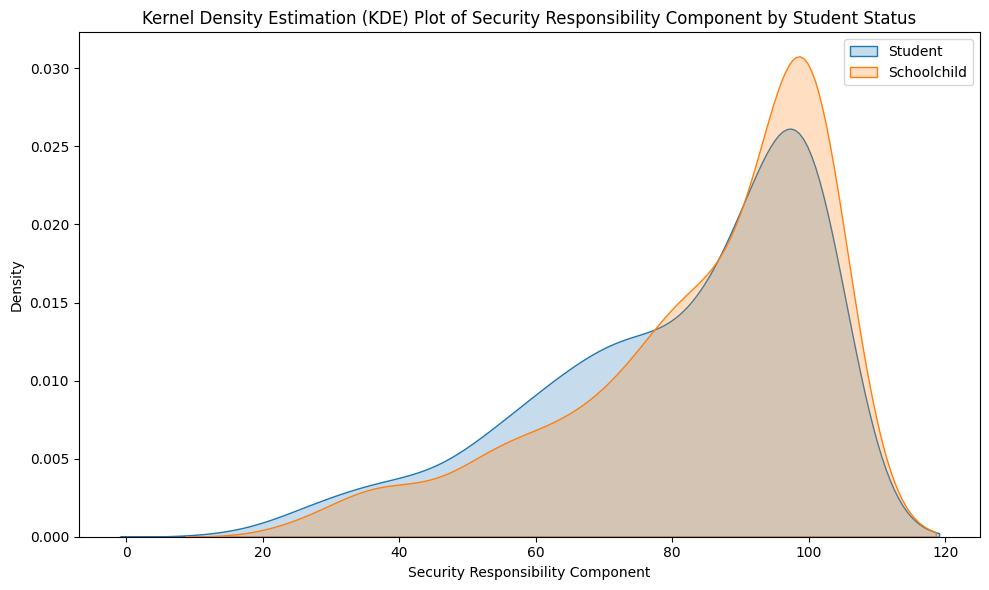

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Create KDE plots
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data[data['Студенты (1)школьники(0)'] == 1], x= 'Компонент ответственности (обеспечения безопасности) ', label='Student', shade=True)
sns.kdeplot(data=data[data['Студенты (1)школьники(0)'] == 0], x= 'Компонент ответственности (обеспечения безопасности) ', label='Schoolchild', shade=True)
plt.title("Kernel Density Estimation (KDE) Plot of Security Responsibility Component by Student Status")
plt.xlabel("Security Responsibility Component")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()




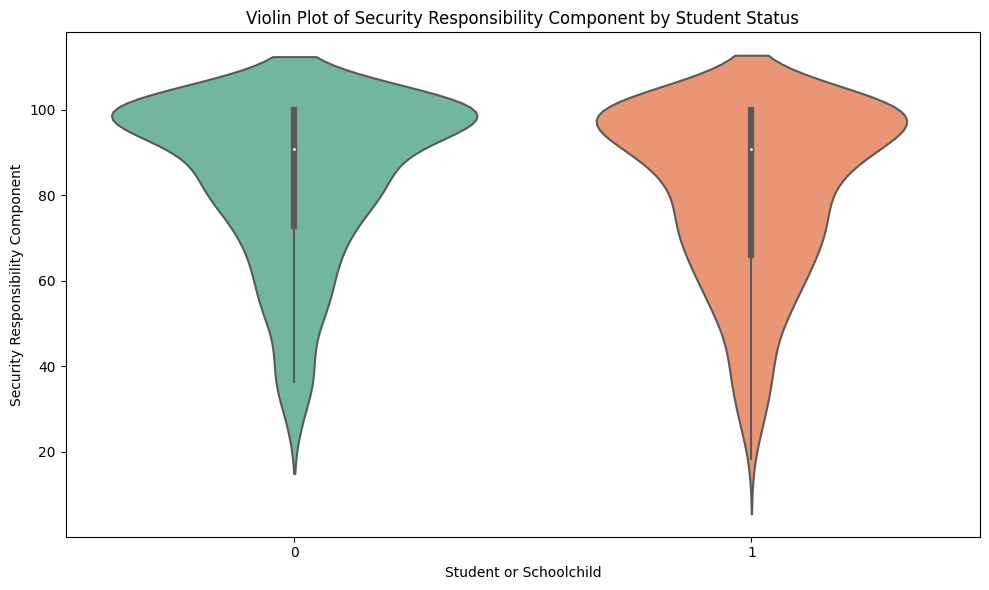

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x=data['Студенты (1)школьники(0)'], y=data['Компонент ответственности (обеспечения безопасности) '], palette="Set2")
plt.title("Violin Plot of Security Responsibility Component by Student Status")
plt.xlabel("Student or Schoolchild")
plt.ylabel("Security Responsibility Component")
plt.tight_layout()
plt.show()


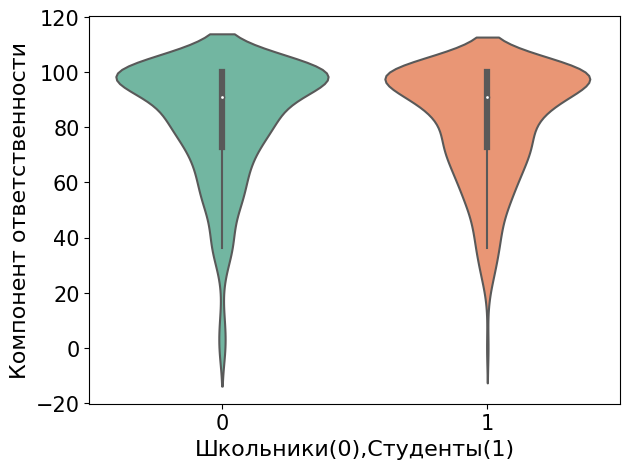

In [19]:
# Fourth Plot
plt.subplot(1, 1, 1)
sns.violinplot(x=data['Студенты (1)школьники(0)'], y=data['Компонент ответственности (обеспечения безопасности) '], palette="Set2")
#plt.title("Violin Plot of Skills Component")
plt.xlabel("Школьники(0),Студенты(1)", fontdict=axis_title_font)
plt.ylabel("Компонент ответственности", fontdict=axis_title_font)
plt.xticks(fontsize=font_size)  # Set tick label font size
plt.yticks(fontsize=font_size)  # Set tick label font size

plt.tight_layout()
plt.show()

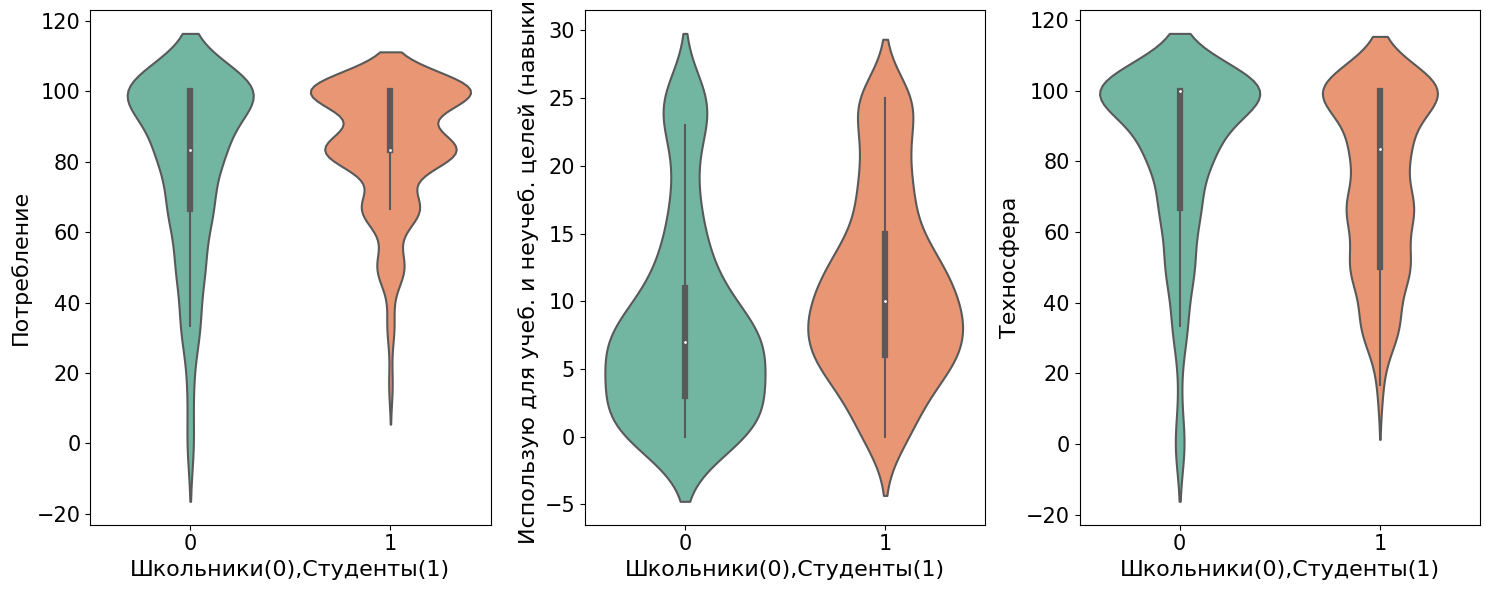

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' contains your dataset
font_size = 15
axis_title_font = {'fontsize': 16}
plt.figure(figsize=(15, 6))

# First Plot
plt.subplot(1, 3, 1)
sns.violinplot(x=data['Студенты (1)школьники(0)'], y=data['Потребление 6 (3,6,12,21,24,25)'], palette="Set2")
#plt.title("Violin Plot of Security Responsibility Component")
plt.xlabel("Школьники(0),Студенты(1)", fontdict=axis_title_font)
plt.ylabel("Потребление", fontdict=axis_title_font)
plt.xticks(fontsize=font_size)  # Set tick label font size
plt.yticks(fontsize=font_size)  # Set tick label font size


# Second Plot
plt.subplot(1, 3, 2)
sns.violinplot(x=data['Студенты (1)школьники(0)'], y=data['Использую и для учебных и для неучебных целей'], palette="Set2")
#plt.title("Violin Plot of Knowledge Component")
plt.xlabel("Школьники(0),Студенты(1)", fontdict=axis_title_font)
plt.ylabel("Использую для учеб. и неучеб. целей (навыки)", fontdict=axis_title_font)
plt.xticks(fontsize=font_size)  # Set tick label font size
plt.yticks(fontsize=font_size)  # Set tick label font size


# Third Plot
plt.subplot(1, 3, 3)
sns.violinplot(x=data['Студенты (1)школьники(0)'], y=data['Техносфера 6 (9,10,14,15,18,22)'], palette="Set2")
#plt.title("Violin Plot of Skills Component")
plt.xlabel("Школьники(0),Студенты(1)", fontdict=axis_title_font)
plt.ylabel("Техносфера", fontdict=axis_title_font)
plt.xticks(fontsize=font_size)  # Set tick label font size
plt.yticks(fontsize=font_size)  # Set tick label font size

plt.tight_layout()
plt.show()





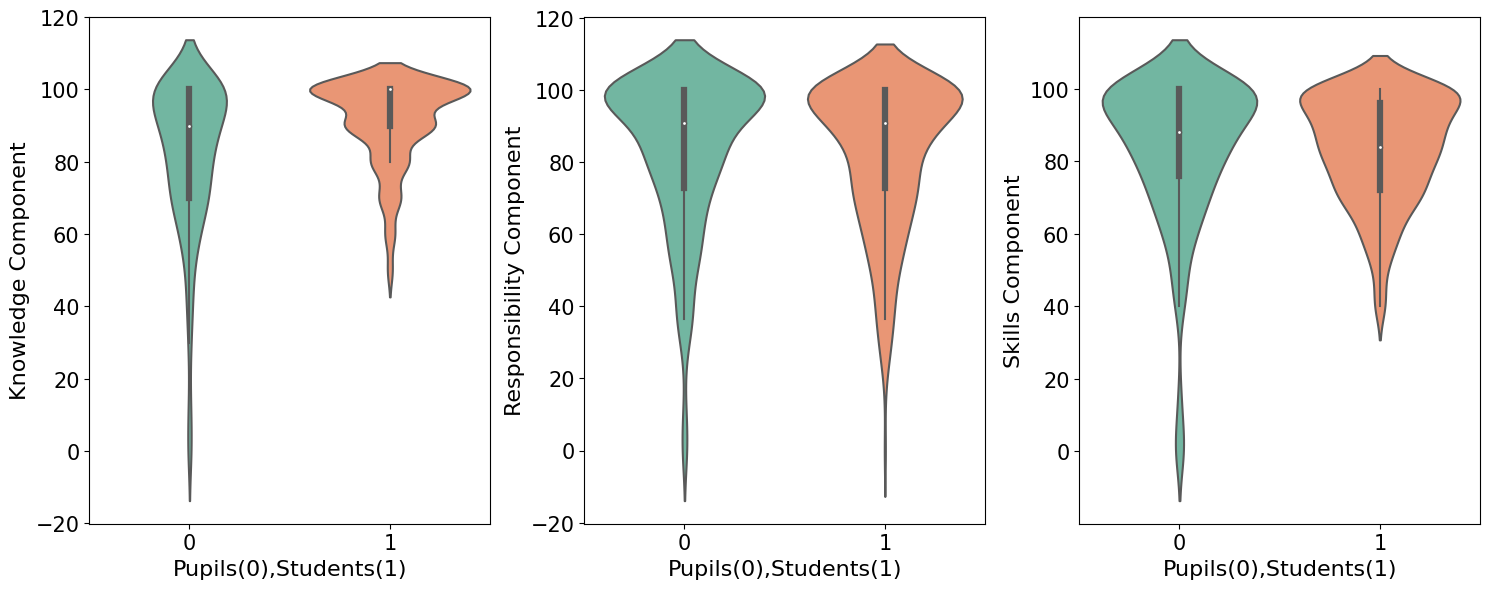

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' contains your dataset
font_size = 15
axis_title_font = {'fontsize': 16}
plt.figure(figsize=(15, 6))

# First Plot
plt.subplot(1, 3, 1)
sns.violinplot(x=data['Студенты (1)школьники(0)'], y=data['Компонент знаний'], palette="Set2")
#plt.title("Violin Plot of Knowledge Component")
plt.xlabel("Pupils(0),Students(1)", fontdict=axis_title_font)
plt.ylabel("Knowledge Component", fontdict=axis_title_font)
plt.xticks(fontsize=font_size)  # Set tick label font size
plt.yticks(fontsize=font_size)  # Set tick label font size

# Second Plot
plt.subplot(1, 3, 2)
sns.violinplot(x=data['Студенты (1)школьники(0)'], y=data['Компонент ответственности (обеспечения безопасности) '], palette="Set2")
#plt.title("Violin Plot of Security Responsibility Component")
plt.xlabel("Pupils(0),Students(1)", fontdict=axis_title_font)
plt.ylabel("Responsibility Component", fontdict=axis_title_font)
plt.xticks(fontsize=font_size)  # Set tick label font size
plt.yticks(fontsize=font_size)  # Set tick label font size

# Third Plot
plt.subplot(1, 3, 3)
sns.violinplot(x=data['Студенты (1)школьники(0)'], y=data['Компонент умений'], palette="Set2")
#plt.title("Violin Plot of Skills Component")
plt.xlabel("Pupils(0),Students(1)", fontdict=axis_title_font)
plt.ylabel("Skills Component", fontdict=axis_title_font)
plt.xticks(fontsize=font_size)  # Set tick label font size
plt.yticks(fontsize=font_size)  # Set tick label font size


plt.tight_layout()
plt.show()


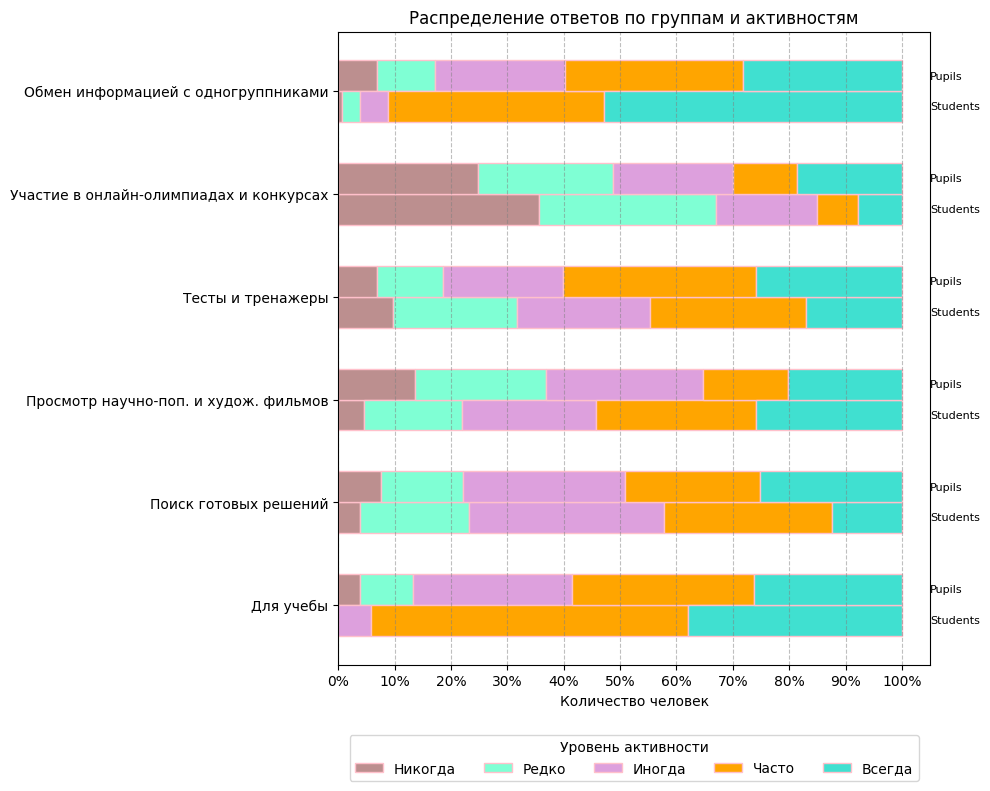

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
activities = [
    "Для учебы", "Поиск готовых решений", "Просмотр научно-поп. и худож. фильмов",
    "Тесты и тренажеры", "Участие в онлайн-олимпиадах и конкурсах",
    "Обмен информацией с одногруппниками"
]

response_labels = ["Никогда", "Редко", "Иногда", "Часто", "Всегда"]
response_colors = ["rosybrown", "aquamarine", "plum", "orange", "turquoise"]

responses_students = np.array([
    [0.00, 0.00, 5.88, 56.21, 37.91],
    [3.92, 19.28, 34.64, 29.74, 12.42],
    [4.58, 17.32, 23.86, 28.43, 25.82],
    [9.80, 21.90, 23.53, 27.78, 16.99],
    [35.62, 31.37, 17.97, 7.19, 7.84],
    [0.65, 3.27, 4.90, 38.24, 52.94]
])

responses_schoolchildren = np.array([
    [3.80, 9.51, 28.14, 32.32, 26.24],
    [7.60, 14.45, 28.90, 23.95, 25.10],
    [13.69, 23.19, 27.76, 15.21, 20.15],
    [6.84, 11.79, 21.29, 34.22, 25.86],
    [24.71, 23.95, 21.29, 11.41, 18.63],
    [6.84, 10.27, 23.19, 31.56, 28.14]
])

y = np.arange(len(activities))  # the label locations
height = 0.30 # adjust the height to reduce the space between activity labels
border_color = "pink"  # color for the border of each bar

fig, ax = plt.subplots(figsize=(10, 8))  # Adjust the figsize here (e.g., figsize=(8, 10))

for i, color in enumerate(response_colors):
    left1 = np.sum(responses_students[:, :i], axis=1)
    left2 = np.sum(responses_schoolchildren[:, :i], axis=1)

    rects1 = ax.barh(y - height/2, responses_students[:, i], height, left=left1, label=response_labels[i], color=color, edgecolor=border_color)
    rects2 = ax.barh(y + height/2, responses_schoolchildren[:, i], height, left=left2, color=color, edgecolor=border_color)

ax.set_xlabel('Количество человек')
ax.set_title('Распределение ответов по группам и активностям')
ax.set_yticks(y)
ax.set_yticklabels(activities)
ax.set_xticks(np.linspace(0, 100, 11))
ax.set_xticklabels(["0%", "10%", "20%", "30%", "40%", "50%", "60%", "70%", "80%", "90%", "100%"])

for percent in np.linspace(0, 100, 11):
    ax.axvline(x=percent, color='gray', linestyle='--', linewidth=0.8, alpha=0.5)


#ax.set_xticks(np.arange(0, 101, 20))
#ax.set_xticklabels(["0%", "20%", "40%", "60%", "80%", "100%"])
#ax.legend(title="Уровень активности")
legend = ax.legend(title="Уровень активности", bbox_to_anchor=(0.5, -0.2), loc="upper center", ncol=5)

# Add labels on the side near bars
for j in range(len(activities)):
    ax.text(105, y[j] - height/2, "Students", ha='left', va='center', color='black', fontsize=8)
    ax.text(105, y[j] + height/2, "Pupils", ha='left', va='center', color='black', fontsize=8)

# Adjust the bbox_to_anchor parameter to bring the legend title closer
legend = ax.legend(title="Уровень активности", bbox_to_anchor=(0.5, -0.1), loc="upper center", ncol=5)


fig.tight_layout()

plt.show()
